In [48]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
! wget https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv

--2023-02-04 04:51:41--  https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv
Resolving homepage.boku.ac.at (homepage.boku.ac.at)... 141.244.187.13
Connecting to homepage.boku.ac.at (homepage.boku.ac.at)|141.244.187.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96988 (95K) [text/x-comma-separated-values]
Saving to: ‘mcdonalds.csv.4’

mcdonalds.csv.4     100%[===================>]  94.71K   410KB/s    in 0.2s    

2023-02-04 04:51:42 (410 KB/s) - ‘mcdonalds.csv.4’ saved [96988/96988]



In [50]:
data = pd.read_csv("mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [51]:
data.shape

(1453, 15)

In [52]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [54]:
data["VisitFrequency"].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [55]:
data["Like"].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [56]:
data["yummy"] = data.yummy.map({"No" : 0, "Yes" : 1})
data["convenient"] = data.convenient.map({"No" : 0, "Yes" : 1})
data["spicy"] = data.spicy.map({"No" : 0, "Yes" : 1})
data["fattening"] = data.fattening.map({"No" : 0, "Yes" : 1})
data["greasy"] = data.greasy.map({"No" : 0, "Yes" : 1})
data["fast"] = data.fast.map({"No" : 0, "Yes" : 1})
data["cheap"] = data.cheap.map({"No" : 0, "Yes" : 1})
data["tasty"] = data.tasty.map({"No" : 0, "Yes" : 1})
data["expensive"] = data.expensive.map({"No" : 0, "Yes" : 1})
data["healthy"] = data.healthy.map({"No" : 0, "Yes" : 1})
data["disgusting"] = data.disgusting.map({"No" : 0, "Yes" : 1})
data["Gender"] = data.Gender.map({"Female" : 0, "Male" : 1})
data["Like"] = data.Like.map({"+3" : 3, "+2" : 2, "+1" : 1, "+4" : 4, "I hate it!-5" : -5, "I love it!+5" : +5, "0" : 0, "-3" : -3, "-2" : -2, "-4" : -4, "-1" : -1})

In [57]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1


In [58]:
data["VisitFrequency"].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [59]:
data1 = pd.get_dummies(data, columns = ['VisitFrequency'])
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,1,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1,0,0,0,1,0,0


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)
data2 = pd.DataFrame(data2)
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.2,0.811321,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.7,0.622642,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.6,0.830189,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.9,0.962264,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.7,0.584906,1.0,0.0,0.0,0.0,1.0,0.0,0.0


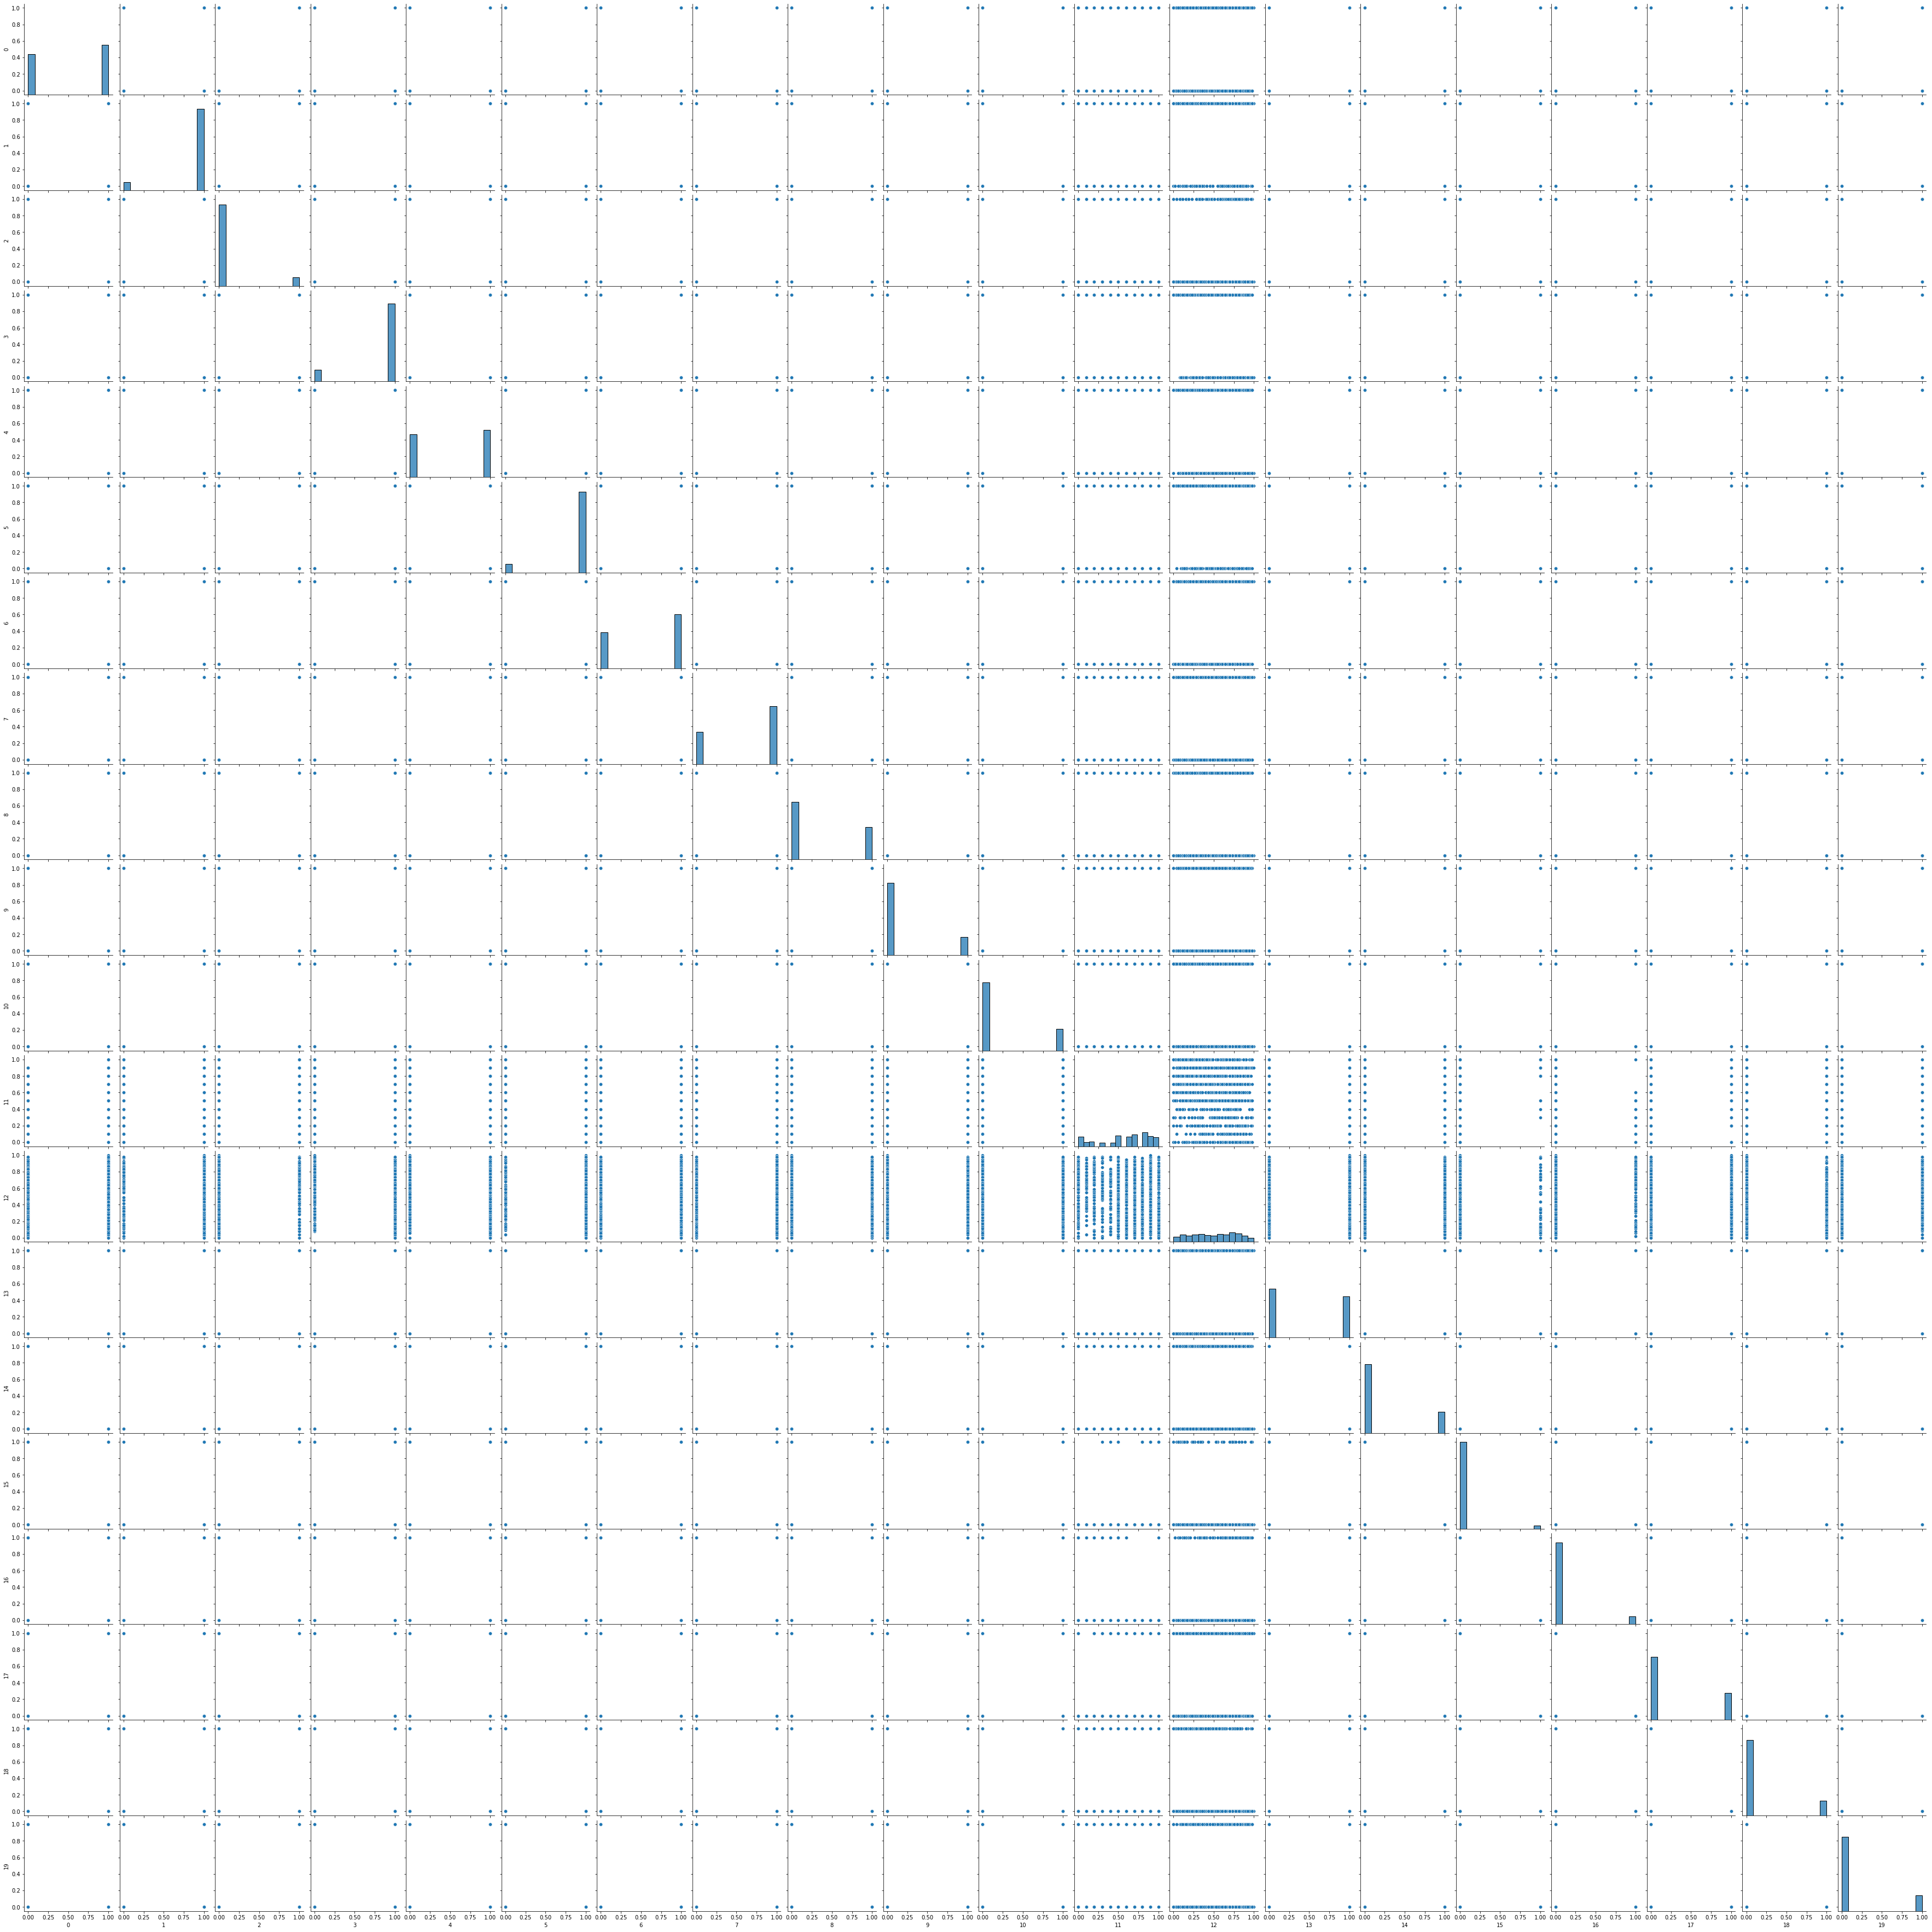

In [71]:
sns.pairplot(data2)

In [66]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 3
pca_data = pca.fit_transform(data2)
data3 = pd.DataFrame(pca_data)

In [68]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.22254079 0.12828784 0.08689093]
Total Variance Explained: 43.77


In [67]:
data3.head()

,0,1,2
0,0.582060,-0.353604,0.641290
1,-0.256841,0.184655,-0.601935
2,0.298530,0.554382,0.022345
3,-0.316048,-0.422720,-0.869888
4,0.085029,-0.425652,0.021400


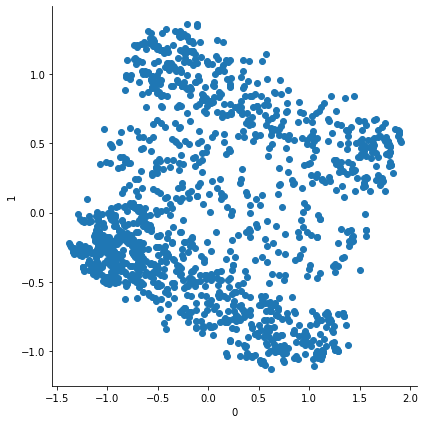

In [92]:
sns.FacetGrid(data3, height=6).map(plt.scatter, 0, 1)
plt.show()

In [69]:
import plotly.express as px
fig = px.scatter_3d(data_frame=None, x=data3.iloc[:,0], y=data3.iloc[:,1], z=data3.iloc[:,2])
fig.show()

In [83]:
pca = decomposition.PCA()
pca.n_components = 19
pca_data1 = pca.fit_transform(data2)
data3 = pd.DataFrame(pca_data1)
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.22254079 0.12828785 0.0868912  0.08179844 0.07701391 0.06477852
 0.05097644 0.04659494 0.0378019  0.03086753 0.02908039 0.02548991
 0.02428508 0.02250462 0.01926047 0.01639353 0.01608599 0.01228436
 0.00706412]
Total Variance Explained: 100.0


In [94]:
from sklearn.manifold import TSNE
model = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=20, n_iter=5000)
tsne_data = model.fit_transform(data2)

In [95]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim_1", "dim_2", "dim_3"))
tsne_df.head()

,dim_1,dim_2,dim_3
0,17.205612,-8.142000,-0.629291
1,8.556051,-1.455395,-9.958488
2,4.720995,-3.404646,-8.575638
3,-2.534005,-21.661488,-1.522723
4,-2.538582,14.507925,-2.665976


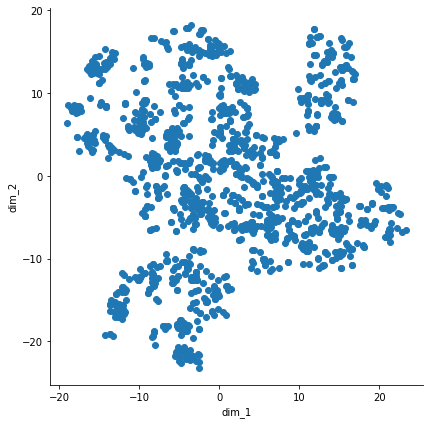

In [96]:
sns.FacetGrid(tsne_df, height=6).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.show()

In [98]:
fig = px.scatter_3d(data_frame=tsne_df, x="dim_1", y="dim_2", z="dim_3")
fig.show()

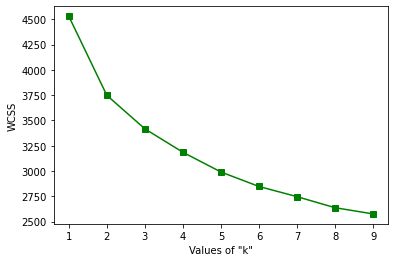

In [89]:
from sklearn.cluster import KMeans 
wcss = {}
for k in range(1,10):
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    model.fit(data2)
    wcss[k] = model.inertia_
plt.plot((np.array(list(wcss.keys())).astype(float)), (np.array(list(wcss.values())).astype(float)), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [102]:
model = KMeans(n_clusters=4).fit(data2)
label = model.labels_
u_labels = np.unique(model.labels_)
model.fit(data2) 
y_pred = model.predict(data2)
y_pred

array([2, 1, 0, ..., 0, 1, 2], dtype=int32)